# Проект: Исследовательский анализ данных Яндекс Недвижимость

**Описание проекта**

Даны данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

**Цель**:
- найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

Задачи: 
- выполнить предобработку данных,
- изучить их, 

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. K первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

# Шаг 1. Изученим общую информацию

In [3]:
#импорт библиотек
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
#читаем файл
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', parse_dates=['first_day_exposition'])
except:
    try:
        data = pd.read_csv('C:\\Users\\Вениамин\\Desktop\\Аналитик Данных\\СПРИНТ 3_Исследовательский анализ данных\\Проект - Яндекс Недвижимость\\real_estate_data.csv', sep = '\t', parse_dates=['first_day_exposition'])
    except:
        data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t', parse_dates=['first_day_exposition'])

In [5]:
#знакомимся с данными
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
#Посмотрим информация о столбцах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [7]:
#Посмотрим на пропуски
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Всего у нас 23699 строки и 22 столбца с данными. В 14 столбцах есть пропущенные значения. Общая доля пропусков составляет 19,5% от общего кол-ва данных.

In [8]:
#Посмотрим на долю пропусков
isna_in_data = pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')
isna_in_data

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


#### Описание данных 

- total_images — число фотографий квартиры в объявлении 
- last_price — цена на момент снятия с публикации 
- total_area — общая площадь квартиры в квадратных метрах (м²)
- first_day_exposition — дата публикации 
- rooms — число комнат 
- ceiling_height — высота потолков (м) 
- floors_total — всего этажей в доме
- living_area — жилая площадь в квадратных метрах (м²)
- floor — этаж
- is_apartment — апартаменты (булев тип) 
- kitchen_area — площадь кухни в квадратных метрах (м²)
- balcony — число балконов
- locality_name — название населённого пункта
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м) 
- cityCenters_nearest — расстояние до центра города (м)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- open_plan — свободная планировка (булев тип)
- studio — квартира-студия (булев тип)

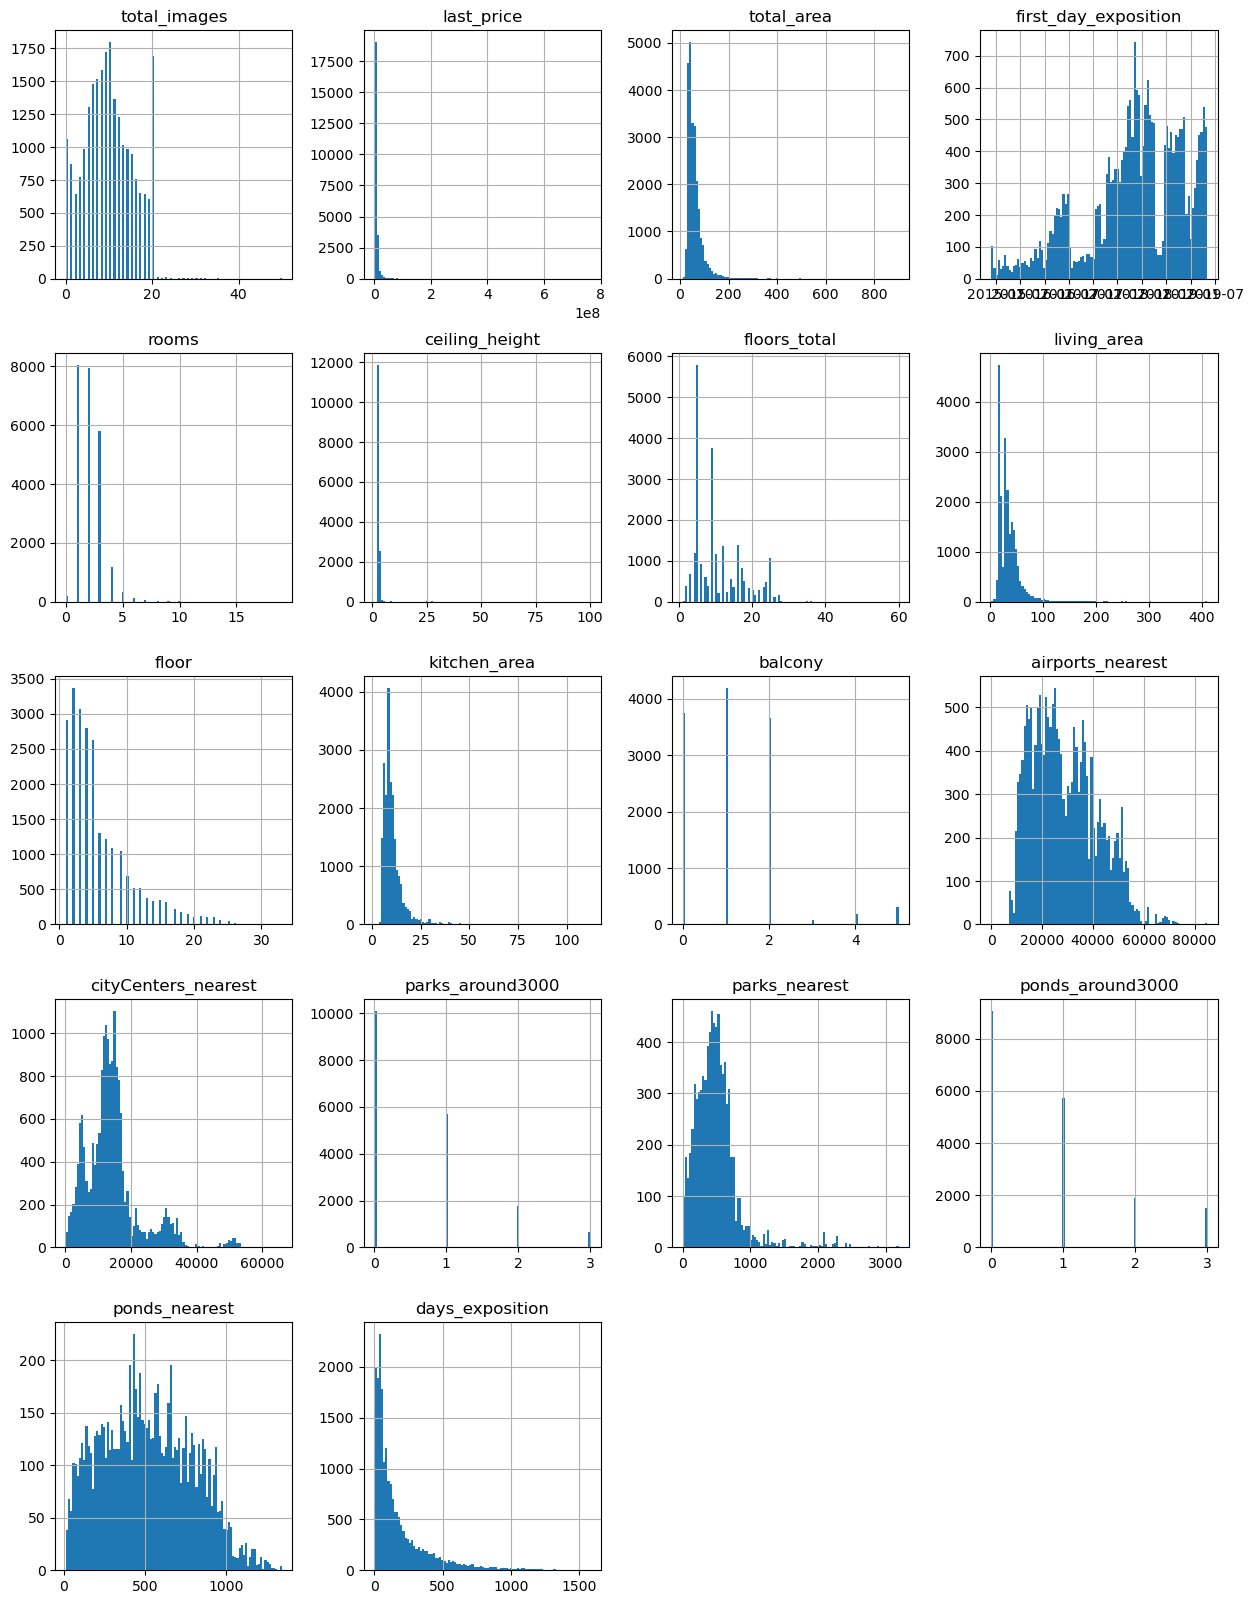

In [9]:
#Построим общую гистограмму для всех числовых столбцов таблицы.
data.hist(bins = 100, figsize= (15, 20));

Вывод: у нас есть пул необработаных данных с пропусками - `19,5%` от общего кол-ва данных. Пропуски планируется закрыть в 8 столбцах, см. ниже. А так же изменим тип данных столбца с bool на int и с object на datetime для дальнейшего выявления закономерностей. 

# Шаг 2. Предобработка данных

## 2.1 Пропуски
Найдем и изучим пропущенные значения в столбцах:

In [10]:
#Сделаем копию датфрейма с недвижимостью.
data_all = data.copy()

In [11]:
data.isna().sum() #проверим в каких столбцах есть пропуски 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Мы выявили 14 стобцов с пропусками. В 64% из всех столбцов есть пропущенные значения.

### locality_name 
- Наименование населённого пункта. Как видим ниже, у нас представлены разнородные населённые пункты: города, села , поселки, садовые товарищества, котеджные поселки, деревни.

In [12]:
data['locality_name'].unique() #уникальные значения столбца с низваниями поселений

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Пустые значения выражены в NaN не смотря на то, что в ячейках буквы "str".

In [13]:
data.loc[data['locality_name'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15,3,3.55,5.0,50.80,2,NaN,...,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30,3,NaN,4.0,42.60,2,NaN,...,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20,1,NaN,24.0,15.60,3,NaN,...,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11,2,NaN,24.0,33.10,21,NaN,...,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28,2,NaN,5.0,30.80,5,NaN,...,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.5,2014-12-09,2,3.00,8.0,39.62,7,NaN,...,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.0,2015-12-10,3,4.00,4.0,52.30,3,False,...,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.0,2015-08-14,3,NaN,7.0,NaN,6,NaN,...,NaN,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.5,2016-01-20,3,NaN,7.0,59.10,5,False,...,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.0,2016-04-29,1,NaN,24.0,20.00,23,NaN,...,NaN,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


Пустых значений в столбце 49 меньше 0,2% от общей массы. Я считаю, что данные значения в столбце нечем заменить, поэтому делаю вывод, что их можно удалить, так как в последующих действиях на основе этого столбца я добавлю еще один - `name_status` , где разделю данные на два значения - Город и Пригород.

In [14]:
data = data.dropna(subset = ['locality_name']) #удаляем строки без значений в столбце 'locality_name'

In [15]:
data.loc[data['locality_name'].isna()].head(10) #проверяем

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Сразу создадим еще один столбец, благодаря которому `name_status`, мы сможем более точно анализировать данные. В столбце будут два значения Город и Пригород. К городу относятся города, а к пригороду (послеки, деревни, СНТ, села и тд.)

In [16]:
def name_status(city): #функция для создания еще одного столбца 
    if 'посел' in city or 'посёл' in city or 'деревн' in city or 'садов' in city or 'село' in city:
        return 'Пригород'
    return 'Город'

data.insert(loc=14, column='name_status', value=data['locality_name'].apply(name_status))

In [17]:
data.query('name_status == "Пригород"').count() #проверим количество квартир в пригороде 

total_images            3642
last_price              3642
total_area              3642
first_day_exposition    3642
rooms                   3642
ceiling_height          1865
floors_total            3631
living_area             3288
floor                   3642
is_apartment             407
studio                  3642
open_plan               3642
kitchen_area            3184
balcony                 1966
name_status             3642
locality_name           3642
airports_nearest         925
cityCenters_nearest      925
parks_around3000         925
parks_nearest             29
ponds_around3000         925
ponds_nearest            251
days_exposition         3218
dtype: int64

 Доля квартир в пригороде составляет `15%` от общего колличества.

### rooms
- кол-во комнат в квартире, из уникальных значений видно, что есть количество комнат равное 0, если выдвинуть гипотезу: люди не ставили кол-во комнат, потому что у них студия

In [18]:
data.loc[data['studio'] == True].count() #148 студий всего 

total_images            149
last_price              149
total_area              149
first_day_exposition    149
rooms                   149
ceiling_height           77
floors_total            146
living_area             139
floor                   149
is_apartment             15
studio                  149
open_plan               149
kitchen_area              0
balcony                  91
name_status             149
locality_name           149
airports_nearest         92
cityCenters_nearest      92
parks_around3000         92
parks_nearest            21
ponds_around3000         92
ponds_nearest            51
days_exposition         135
dtype: int64

In [19]:
data.loc[data['rooms'] == 0] #проверим количество комнат равных 0

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,name_status,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,NaN,...,2.0,Пригород,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.00,1,NaN,...,0.0,Пригород,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,NaN,...,2.0,Город,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.30,19,NaN,...,1.0,Пригород,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,NaN,...,NaN,Пригород,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25.0,18.00,16,NaN,...,0.0,Город,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28,0,NaN,24.0,18.00,4,NaN,...,2.0,Пригород,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19.0,NaN,8,NaN,...,NaN,Город,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11,0,NaN,9.0,18.00,8,NaN,...,2.0,Город,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


In [20]:
data.loc[(data['rooms'] == 0) & (data['studio']== True)].count() #по условию найдем кол-во комнат с значением 0 и студии 

total_images            138
last_price              138
total_area              138
first_day_exposition    138
rooms                   138
ceiling_height           72
floors_total            135
living_area             128
floor                   138
is_apartment              5
studio                  138
open_plan               138
kitchen_area              0
balcony                  80
name_status             138
locality_name           138
airports_nearest         87
cityCenters_nearest      87
parks_around3000         87
parks_nearest            20
ponds_around3000         87
ponds_nearest            48
days_exposition         124
dtype: int64

и таких значений 137, что подтверждает мою гипотезу, в таком случае - студия это одна комната , заменим все значения `data['rooms'] == 0` c 0 на 1.

In [21]:
data.loc[data['rooms'] == 0, 'rooms'] = 1 #заменим значения комнат равных 0 единицей

### ceiling_height
 - высота потолков (тип ячейки float), пропуски выражены в значениях Nan, значения в стобце являются количественными, поэтому заменим пропуски медианным значением.

In [22]:
data['ceiling_height'].describe() #воспользуемся методом "describe" и найдем показатели min и max 

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

`Max = 100`, в данных явно допущены ошибки, так как 100м над уровнем потолка , быть не может. Посмотрим уникальные значения столбца.

In [23]:
sorted(data['ceiling_height'].unique()) #посмотрим на уникальные значения столбца

[1.0,
 2.0,
 2.3,
 2.4,
 2.45,
 2.46,
 2.48,
 2.53,
 2.59,
 2.62,
 2.63,
 2.7,
 nan,
 1.2,
 1.75,
 2.2,
 2.25,
 2.34,
 2.47,
 2.49,
 2.5,
 2.51,
 2.52,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.6,
 2.61,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,


Максимально возможная высота потолков в квартирах равна 4.5м, а минимальная 2.3м (если брать в учет, что их опустили натяжным потолком или гипсокартоном). Будем считать квартиру/аппартаменты с потолками от 2.3м до 4.5м нормой. Поэтому откинем все значения, которые ниже 2.3 и выше 4.5, но для начала мы заполним все пустые значения NaN медианным, так как эта величина является количественной.

In [24]:
data_notcity = data.loc[data['name_status'] == 'Пригород'] #найдем медианное значение для квартир в Пригороде и заполним их
print(data_notcity['ceiling_height'].median())

for x in data['ceiling_height'].unique():
    data.loc[(data['name_status'] == 'Пригород') & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['name_status'] == 'Пригород'), 'ceiling_height'].median()

2.6


In [25]:
data_city = data.loc[data['name_status'] == 'Город'] #найдем медианное значение для квартир в Городе и заполним их
print(data_city['ceiling_height'].median())

for x in data['ceiling_height'].unique():
    data.loc[(data['name_status'] == 'Город') & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['name_status'] == 'Город'), 'ceiling_height'].median()

2.65


In [26]:
data['name_status'].isna().sum() #делаем проверку

0

Мы избавились от пустых значений, а теперь избавимся от выбросов.

In [27]:
data = data.query('2.3 < ceiling_height < 4.5') #отрезаем выбросы

In [28]:
data.shape[0]

23581

### floors_total
- всего этажей в доме   

In [29]:
data['floors_total'].unique() #из уникальных значений мы видим, что у нас есть Nan

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52.])

Выявили закономерность, в столбце `"floors_total"` и `"is_apartment"` пропуски повторяются, но это не о чем не говорит. Так как 1 этажные и 52 этажные дома имеют место быть в СПБ и окрестностях заменим пропуски на медианное значение.  

In [30]:
data.loc[(data['floors_total'].isna()) & (data['is_apartment'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,name_status,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02,2,2.65,NaN,30.80,4,NaN,...,NaN,Город,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23,1,2.65,NaN,20.75,1,NaN,...,0.0,Город,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01,2,2.65,NaN,38.40,12,NaN,...,0.0,Город,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06,3,2.65,NaN,47.10,8,NaN,...,0.0,Город,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22,1,2.65,NaN,NaN,9,NaN,...,0.0,Город,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24,2,2.80,NaN,NaN,3,NaN,...,NaN,Город,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02,2,2.65,NaN,31.70,20,NaN,...,0.0,Город,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20,3,2.65,NaN,45.38,6,NaN,...,0.0,Город,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25,3,2.65,NaN,50.40,18,NaN,...,0.0,Город,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


In [31]:
data['floors_total'].describe() #вычислим статистические данные

count    23496.000000
mean        10.682627
std          6.591121
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [32]:
data.query('floors_total == 60') #найден в Кронштадте - 60 этажей, таких там нет , поэтому сократим это значение

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,name_status,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60.0,27.4,4,NaN,...,NaN,Город,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0


In [33]:
#Самое Высотное здание находится в городе Кронштадт, там таких нет. Значит значение неверное.
data = data.query('floors_total <= 52') 

In [34]:
data.loc[data['floors_total'].isna(), 'floors_total'] = data['floors_total'].median() #заменим пропуски на медианное значение

### living_area 
- жилая площадь в квадратных метрах (м²), найдем пропуски и заполним их медианным значением по количеству комнат. Т.е. среднее значение по кол-ву комнат, но может возникнуть проблема , что средние значения жилой площади (living_area) по кол-ву комнат могут быть больше , чем (total_area), поэтому от таких случев необходимо избавиться.

In [35]:
for room in data['rooms'].unique():  #заменим пустые значения на медианные
    data.loc[(data['living_area'].isna()) & (data['rooms'] == room), 'living_area'] = \
    data.loc[data['rooms'] == room, 'living_area'].median()

In [36]:
data = data.loc[data['living_area'] < data['total_area']] #оставим только те значения где total_area > living_area 

In [37]:
data.query('total_area<living_area') #проверим

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,name_status,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


### is_apartment 
- апартаменты (булев тип), значения - список уникальных значений (True/False), но в данном столбце 87% пропусков. Есть гипотеза, что люди ничего не отмечали в категории "apartment" (так как знали , что апартаменты это коммерческая недвижимость), т.е. Nan = "False".

In [38]:
data.loc[data['is_apartment'].isna()] #Найдем пустые значения в столбце "апартаменты"

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,name_status,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,NaN,Город,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.60,11.0,18.6,1,NaN,...,2.0,Пригород,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,0.0,Город,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,45.0,9,NaN,...,0.0,Город,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,NaN,Город,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,NaN,Город,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.0,4,NaN,...,NaN,Город,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.60,3.0,29.7,1,NaN,...,NaN,Пригород,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,30.5,12,NaN,...,2.0,Город,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [39]:
data['is_apartment'] = data['is_apartment'].fillna(False) #заменим все значения 

In [40]:
data.isna().sum() #проверим результаты

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2180
balcony                 11418
name_status                 0
locality_name               0
airports_nearest         5484
cityCenters_nearest      5462
parks_around3000         5461
parks_nearest           15467
ponds_around3000         5461
ponds_nearest           14471
days_exposition          3156
dtype: int64

### kitchen_area 
- площадь кухни в квадратных метрах (м²) 9% пропусков от общей массы количества строк. Заменим медианными значениями по колличеству комнат . 

In [41]:
data.loc[data['kitchen_area'].isna()] #посмотрим на пустые значения в столбце "kitchen_area" 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,name_status,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,0.0,Город,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19,1,2.65,9.0,17.6,2,False,...,NaN,Город,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28,2,2.50,5.0,30.5,1,False,...,NaN,Пригород,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18,1,2.65,22.0,17.6,3,False,...,1.0,Город,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06,1,2.65,13.0,17.6,13,False,...,NaN,Город,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.0,40.5,2016-09-08,1,2.56,18.0,19.6,10,False,...,NaN,Город,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0
23663,12,6400000.0,88.0,2018-01-12,4,2.55,10.0,63.5,1,False,...,NaN,Город,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.6,2018-02-08,1,2.80,9.0,17.6,2,False,...,NaN,Пригород,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.0,2017-12-08,1,2.65,9.0,17.6,4,False,...,NaN,Город,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [42]:
for room in data['rooms'].unique():  #заменим пустые значения на медианные
    data.loc[(data['kitchen_area'].isna()) & (data['rooms'] == room), 'kitchen_area'] = \
    data.loc[data['rooms'] == room, 'kitchen_area'].median()

In [43]:
data.loc[data['kitchen_area'].isna()] #проверим

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,name_status,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Еще заметили одну особенность, так как пропуски в living_area закрыты медианным значением, как и в kitchen_area , то может произойти следущее: living_area (общая площадь) + kitchen_area (площадь кухни) будет больше , чем total_area (общая площадь), данное явление необходимо предотвратить.

In [44]:
#оставим только те значения где общая площадь больше или равна кухня + жилая
data = data.query('(living_area + kitchen_area) <= total_area')

### balcony 
- наличие балкона в квартире , есть предположение , что люди не отмечали число балконов в квартире , если их нет, так и появились пропуски - заменим пропуски на 0

In [45]:
data['balcony'].unique() #посмотрим уникальное количество балконов в данном столбце

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [46]:
data.loc[data['balcony'].isna() , 'balcony'] = 0 #заменим пропуски на 0 

In [47]:
data.loc[data['balcony'].isna()] #проверим

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,name_status,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [48]:
#Посмотрим на пропуски
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
name_status                 0
locality_name               0
airports_nearest         5331
cityCenters_nearest      5309
parks_around3000         5308
parks_nearest           15164
ponds_around3000         5308
ponds_nearest           14215
days_exposition          3127
dtype: int64

### cityCenters_nearest 
- отдаленность от центра города

In [49]:
#Заменим на 0
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].fillna(0)
#data['parks_nearest'] = data['parks_nearest'].fillna(0)

#### Вывод:

- locality_name (очистили данные с пропусками, так как заменить их было нечем, на мой взгляд, тем более 49 строк, это меньше 0.2% от общего кол-ва)

- rooms (в уникальные значения попал - 0, такого количества комнат не бывает, если только не имел в виду студию, проверив эту гипотезу, она подтвердилась)

- ceiling_height (пропуски в данном столбце заменены на средние медианные значения по нововыденому столбцу с значениями: "Город" и "Пригород", в уникальных значениях было обнаружено высота потолков более 4.5 м, таких значений не бывает , они сокращены)

- floors_total (этажность в дома, мы удалили самое большое значение - 60 этажей, таких домов в г. Крондштат не было никогда, пропуски этажей заменили на медианные значения)

- living_area (пропуски в жилой площади закрыты по медианному значению кол-ва комнат в доме, у нас вылезла небольшая проблема - средние значения жилой площади (living_area) по кол-ву комнат могут быть больше , чем (total_area), поэтому от таких случев избавились)

- is_apartment ( в данном столбце выявили гипотезу, что люди ничего не отмечали в категории "apartment" (так как знали , что апартаменты это коммерческая недвижимость), т.е. Nan = "False".)

- kitchen_area (пропуски в кухонной площади закрыты по медианному значению кол-ва комнат в доме)

- balcony (есть предположение , что люди не отмечали число балконов в квартире , если их нет, так и появились пропуски - заменили пропуски на 0)

- cityCenters_nearest,parks_nearest (заменили пустые значения на 0)

<div align="center"><b> Все пропуски, которым, по моему мнению, есть логическое объяснение заменены. Таблица очищена на 2,5% данных, которые могли бы неправильно повлиять на анализ. </b></div> 

In [50]:
#Явных дубликатов нет
data.duplicated().sum()

0

## **2.2 Типы данных**
Замена типов данных.

In [51]:
#Посмотрим на тип столбцов
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23089 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23089 non-null  int64         
 1   last_price            23089 non-null  float64       
 2   total_area            23089 non-null  float64       
 3   first_day_exposition  23089 non-null  datetime64[ns]
 4   rooms                 23089 non-null  int64         
 5   ceiling_height        23089 non-null  float64       
 6   floors_total          23089 non-null  float64       
 7   living_area           23089 non-null  float64       
 8   floor                 23089 non-null  int64         
 9   is_apartment          23089 non-null  bool          
 10  studio                23089 non-null  bool          
 11  open_plan             23089 non-null  bool          
 12  kitchen_area          23089 non-null  float64       
 13  balcony         

In [52]:
#Откроем первые 10 строк таблицы
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,name_status,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,0.0,Город,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.60,11.0,18.60,1,False,...,2.0,Пригород,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,0.0,Город,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,45.00,9,False,...,0.0,Город,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,0.0,Город,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.60,12.0,14.40,5,False,...,0.0,Пригород,городской посёлок Янино-1,NaN,0.0,NaN,0.0,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.60,26.0,10.60,6,False,...,1.0,Пригород,посёлок Парголово,52996.0,19143.0,0.0,0.0,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,30.50,22,False,...,2.0,Город,Санкт-Петербург,23982.0,11634.0,0.0,0.0,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.60,27.0,15.43,26,False,...,0.0,Пригород,посёлок Мурино,NaN,0.0,NaN,0.0,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,2.0,Город,Санкт-Петербург,50898.0,15008.0,0.0,0.0,0.0,NaN,289.0


### first_day_exposition
3-ий по порядку столбец с датой и типом `object`, заменим его на `datetime`

In [53]:
#изменяем тип на datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 

### is_apartment
9-ый по порядку столбец с датой и типом `bool`, заменим его на `int` и присвоим значениям True = 1, False = 0.

In [54]:
#присвоение значений
data.loc[data['is_apartment'] == True, 'is_apartment'] = 1
data.loc[data['is_apartment'] == False, 'is_apartment'] = 0

In [55]:
data['is_apartment'].unique() #проверяем

array([0, 1], dtype=object)

In [56]:
#Меняем тип 
data['is_apartment'] = data['is_apartment'].astype('int')

### studio
10-ый по порядку столбец с датой и типом `bool`, заменим его на `int` и присвоим значениям True = 1, False = 0.

In [57]:
#присвоение значений
data.loc[data['studio'] == True, 'studio'] = 1
data.loc[data['studio'] == False, 'studio'] = 0

In [58]:
#Меняем тип 
data['studio'] = data['studio'].astype('int')

### open_plan
11-ый по порядку столбец с датой и типом bool, заменим его на `int` и присвоим значениям True = 1, False = 0.

In [59]:
#присвоение значений
data.loc[data['open_plan'] == True, 'open_plan'] = 1
data.loc[data['open_plan'] == False, 'open_plan'] = 0

In [60]:
#Меняем тип 
data['open_plan'] = data['open_plan'].astype('int')

In [61]:
#Меняем тип 
data['balcony'] = data['balcony'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)

**Проверим все исправленые типы стобцов**

In [62]:
#Посмотрим на тип столбцов
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23089 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23089 non-null  int64         
 1   last_price            23089 non-null  float64       
 2   total_area            23089 non-null  float64       
 3   first_day_exposition  23089 non-null  datetime64[ns]
 4   rooms                 23089 non-null  int64         
 5   ceiling_height        23089 non-null  float64       
 6   floors_total          23089 non-null  int32         
 7   living_area           23089 non-null  float64       
 8   floor                 23089 non-null  int64         
 9   is_apartment          23089 non-null  int32         
 10  studio                23089 non-null  int32         
 11  open_plan             23089 non-null  int32         
 12  kitchen_area          23089 non-null  float64       
 13  balcony         

#### Вывод 
исправленизначений и смене типов подверглись следующие столбцы:
* first_day_exposition
* is_apartment
* studio
* open_plan
* balcony
* floors_total

для возможности анализировать знчения

## 2.3 Дубликаты

Неявные дубликаты были замечены в столбце `data['locality_name']`. В виде "поселок"/"посёлок" и тд. Создадим столбец под названием `locality_status`, где выделим статусы насленных пунктов: 
- поселок
- деревня
- село 
- город
- ст (садовые товарищества)

Следующим действием отделим наименования населенных пунктов от статусов. 

In [63]:
data["locality_name"].unique() #Посмотрим уникальные значения столбца locality_name

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Сперва отделим статус населенного пункта от названия `locality_status`.

In [64]:
#Создадим функцию
def location(locality_name): 
    if "посело" in locality_name or "посёло" in locality_name or "Посёло" in locality_name or "Посело" in locality_name:
        return 'поселок'
    if "деревн" in locality_name or "Деревн" in locality_name:
        return 'деревня'
    if "село" in locality_name or "Село" in locality_name:
        return 'село'
    if "садово" in locality_name or "Садово" in locality_name:
        return 'ст'
    else:
        return 'Город'

#Вставим столбец
data.insert(loc=16, column='locality_status', value=data['locality_name'].apply(location))  

In [65]:
#Проверим
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,name_status,locality_name,locality_status,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,0,...,Город,Санкт-Петербург,Город,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.60,11,18.6,1,0,...,Пригород,посёлок Шушары,поселок,12817.0,18603.0,0.0,0.0,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,0,...,Город,Санкт-Петербург,Город,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,45.0,9,0,...,Город,Санкт-Петербург,Город,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,0,...,Город,Санкт-Петербург,Город,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,0,...,Город,Санкт-Петербург,Город,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,0,...,Город,Тосно,Город,NaN,0.0,NaN,0.0,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.60,3,29.7,1,0,...,Пригород,село Рождествено,село,NaN,0.0,NaN,0.0,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.5,12,0,...,Город,Санкт-Петербург,Город,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


А теперь удалим статус населенного пункта из 'locality_name'

In [66]:
 data['locality_name'] = data['locality_name'].str.replace('|'.join(['посёлок ', 'поселок ', 'городской ', ' городского ', ' типа ', 'коттеджный ', \
                         'садоводческое некоммерческое товарищество ', 'садоводческое товарищество ', \
                         'деревня ', 'село ', 'садовое товарищество ', 'городского типа ']), '', regex=True)

In [67]:
data['locality_name'].unique() #проверим уникальные значения в столбце locality_name

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Сланцы', 'Путилово',
       'Ивангород', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'Новый Свет', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Победа', 'Нурма',
       'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск', 'Александ

# Шаг 3. Добавим в таблицу новые столбцы со следующими параметрами:

##### 1. Цена одного квадратного метра;

Для выполнения такой задачи, необходимо разделить столбец с ценой за квартиру на общую площадь

In [68]:
#Добавление столбца
data.insert(loc=3, column='cost_meter', value=round(data['last_price'] / data['total_area'], 1))

##### 2. День недели публикации объявления;

In [69]:
#Добавление столбца
data.insert(loc=5, column='number_day', value=data['first_day_exposition'].dt.weekday)     

##### 3. Mесяц публикации объявления;

In [70]:
#Добавление столбца
data.insert(loc=6, column='number_month', value=pd.DatetimeIndex(data['first_day_exposition']).month)     

##### 3. Год публикации объявления;

In [71]:
#Добавление столбца
data.insert(loc=7, column='number_year', value=pd.DatetimeIndex(data['first_day_exposition']).year)     

Проверим:

In [72]:
data.head() #все работает

,total_images,last_price,total_area,cost_meter,first_day_exposition,number_day,number_month,number_year,rooms,ceiling_height,...,name_status,locality_name,locality_status,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,120370.4,2019-03-07,3,3,2019,3,2.70,...,Город,Санкт-Петербург,Город,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,82920.8,2018-12-04,1,12,2018,1,2.60,...,Пригород,Шушары,поселок,12817.0,18603.0,0.0,0.0,0.0,NaN,81.0
2,10,5196000.0,56.0,92785.7,2015-08-20,3,8,2015,2,2.65,...,Город,Санкт-Петербург,Город,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,408176.1,2015-07-24,4,7,2015,3,2.65,...,Город,Санкт-Петербург,Город,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,100000.0,2018-06-19,1,6,2018,2,3.03,...,Город,Санкт-Петербург,Город,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


##### 4. Тип этажа квартиры (значения — «‎первый», «последний», «другой»);

In [73]:
#Создадим функцию
def floor_share(floor,floor_total):
    if floor ==  1:
        return 'первый этаж'
    if floor == floor_total:
        return 'последний этаж'
    else:
        return 'другой'
data.insert(loc=13, column='floor_share', value=data.apply(lambda x: floor_share(x['floor'], x['floors_total']), axis=1))

In [74]:
data['floor_share'].unique() #проверим

array(['другой', 'первый этаж', 'последний этаж'], dtype=object)

##### 5. Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [75]:
data['cityCenters_nearest'].unique() #посмотрим как выглядят уникальные значения

array([16028., 18603., 13933., ..., 27977.,  7262.,  6263.])

In [76]:
data.insert(loc=24, column='city_nearest_km', value=round(data['cityCenters_nearest'] / 1000, 0))
#поделим значения столбца cityCenters_nearest на 1000 и получим км, а после округлим 

In [77]:
data['city_nearest_km'].unique() #проверим

array([16., 19., 14.,  7.,  8.,  0., 12., 15., 52., 33., 31., 11., 13.,
       10.,  2., 32.,  4., 17., 30.,  5., 51., 50., 24., 18.,  9., 28.,
        3.,  6., 27., 21., 49., 35., 36., 34.,  1., 29., 26., 53., 22.,
       55., 20., 23., 25., 66., 47., 40., 57., 37., 41., 43., 48., 62.,
       60., 39., 42., 65., 54., 59., 45., 61., 63.])

# Шаг 4. Проведем исследовательский анализ данных:

#### 1. Изучение объектов

##### Общая площадь

In [78]:
#данные статистического формата
data['total_area'].describe() 

count    23089.000000
mean        60.706896
std         35.407405
min         14.000000
25%         40.400000
50%         52.200000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

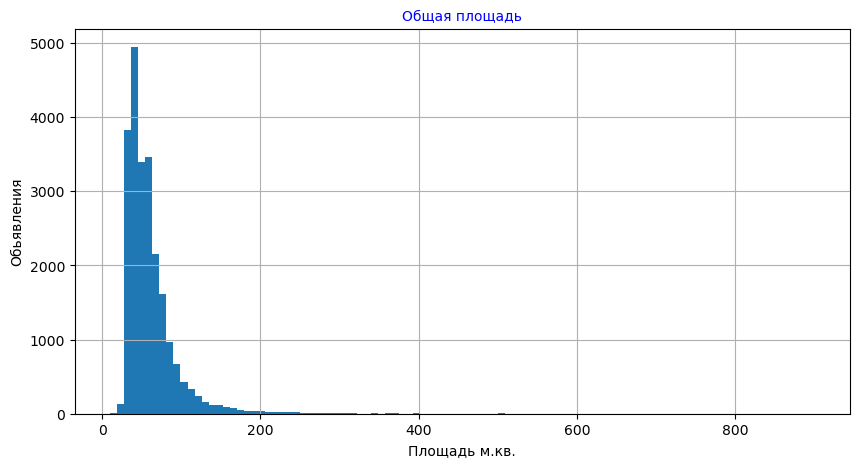

In [79]:
#построим график распределения объявлений по площади
(data['total_area'] 
  .plot(kind= 'hist', bins=100, range=(10, 900), figsize=(10,5), legend = False, fontsize = 10, grid=True) 
  .set_title('Общая площадь', fontsize = 10, color = 'Blue')); 
 
plt.xlabel('Площадь м.кв.',fontsize = 10) 
plt.ylabel('Обьявления',fontsize = 10) 
plt.show()

Вывод: Максимальное значение 900 кв.м. Минимальное 14 кв.м. Большее количество объявлений с квартирами, площадь которых находится в диапазоне от 42 до 60 кв.м. А далее идет на гистограмма идет убывание, чем показывает уменьшение количества кватир с большей площадью.

##### жилая площадь

In [80]:
#данные статистического формата
data['living_area'].describe() 

count    23089.000000
mean        34.375640
std         21.539999
min          2.000000
25%         18.500000
50%         30.500000
75%         42.800000
max        409.700000
Name: living_area, dtype: float64

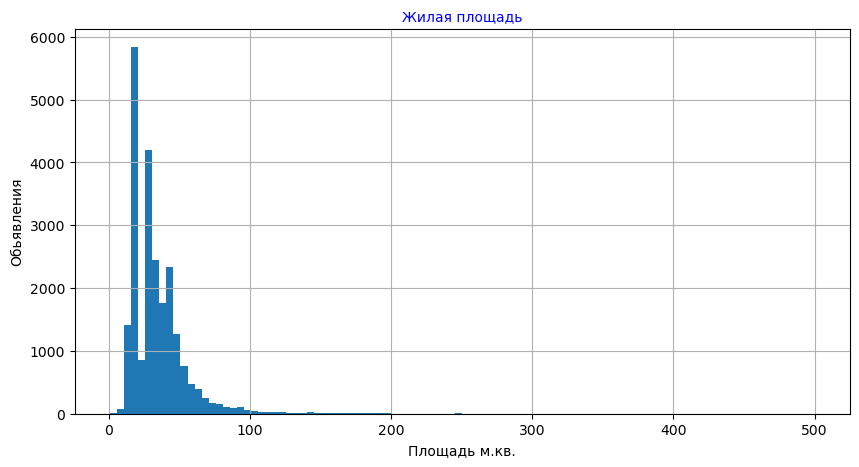

In [81]:
#построим график распределения объявлений по жилой площади
(data['living_area'] 
  .plot(kind= 'hist', bins=100, range=(1, 500), figsize=(10,5), legend = False, fontsize = 10, grid=True) 
  .set_title('Жилая площадь', fontsize = 10, color = 'Blue')); 
 
plt.xlabel('Площадь м.кв.',fontsize = 10) 
plt.ylabel('Обьявления',fontsize = 10) 
plt.show()

Вывод: Максимальное значчение 409 м.кв. Минимальное значение 2 м.кв. Самое большее количество объявлений с площаью от 30 до 50 кв. м. после график идет на спад, колличество квартир , у которых площадь больше 50 начинает резко снижаться, что доказывает гипотезу, о количестве жилой площади - чем больше жилой площади в квартире, тем меньше таких квартир выставляют на продажу. 

##### площадь кухни

In [82]:
#данные статистического формата
data['kitchen_area'].describe() 

count    23089.000000
mean        10.439025
std          5.645806
min          1.300000
25%          7.200000
50%          9.010000
75%         11.500000
max        112.000000
Name: kitchen_area, dtype: float64

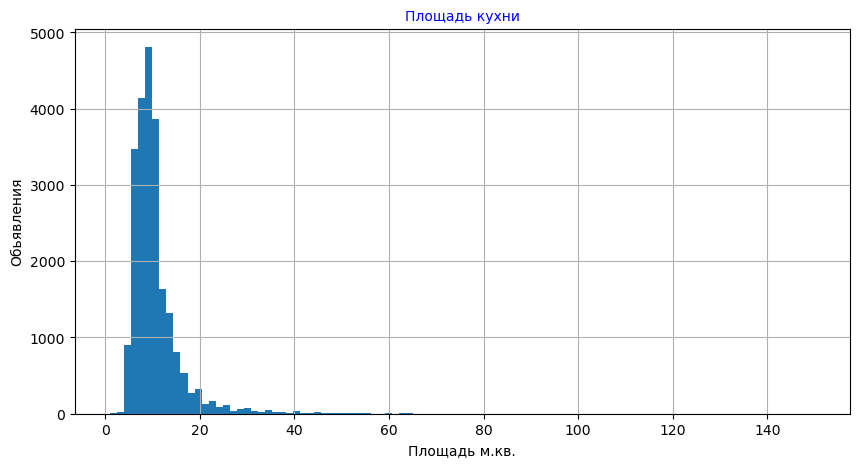

In [83]:
#построим график распределения объявлений по площади кухни
(data['kitchen_area'] 
  .plot(kind= 'hist', bins=100, range=(1, 150), figsize=(10,5), legend = False, fontsize = 10, grid=True) 
  .set_title('Площадь кухни', fontsize = 10, color = 'Blue')); 
 
plt.xlabel('Площадь м.кв.',fontsize = 10) 
plt.ylabel('Обьявления',fontsize = 10) 
plt.show()

Вывод: Максимальное значение 112. Минимальное значение 1. Можно выстроить утверждение , в большинстве своем кухня занимает 1/3 от общей площади квартиры. Данный график доказывает это утверждение, больше всего квартир, площадь кухни которых составляет от 8 до 12 кв.м. далее чем больше площадь самой квратиры , тем больше кухня. 

##### цена объекта

In [84]:
grap = data['last_price'] / 1000000

In [85]:
#данные статистического формата
grap.describe()

count    23089.000000
mean         6.560303
std         10.820095
min          0.012190
25%          3.470502
50%          4.680000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

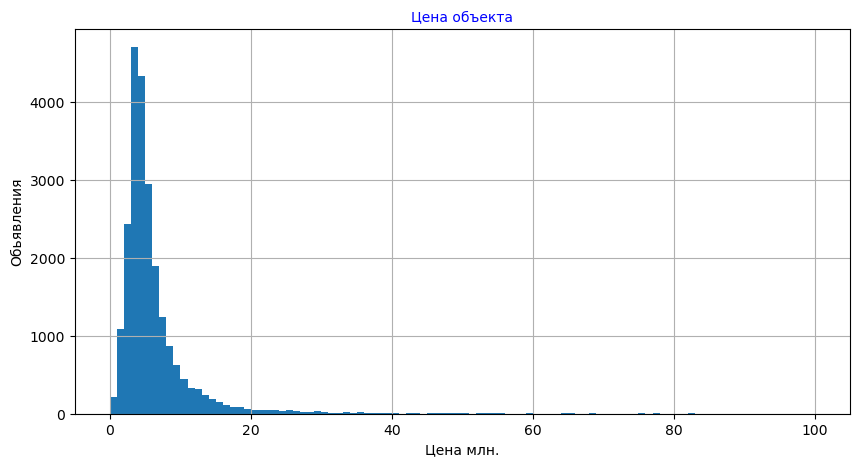

In [86]:
#построим график распределения объявлений по ценам
(grap 
  .plot(kind= 'hist', bins=100, range=(0, 100), figsize=(10,5), legend = False, fontsize = 10, grid=True) 
  .set_title('Цена объекта', fontsize = 10, color = 'Blue')); 
 
plt.xlabel('Цена млн.',fontsize = 10) 
plt.ylabel('Обьявления',fontsize = 10) 
plt.show()

Вывод: Квартира с наименьшей стоимостью в 0.01 млн. В среднем большая часть квартир из датасета выставлена по цене от 4.5 до 5 млн.р. Самая большая стоимость за квартиру 763 млн. 

##### количество комнат

In [87]:
#данные статистического формата
data['rooms'].describe()

count    23089.000000
mean         2.087617
std          1.062206
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

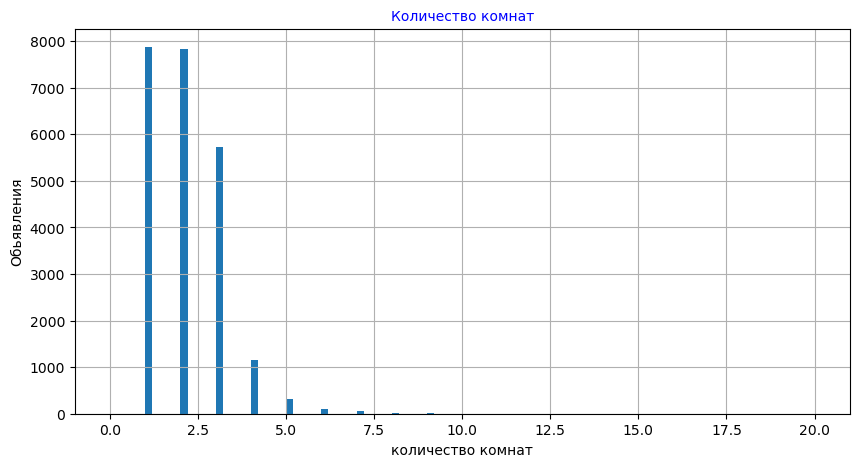

In [88]:
#построим график распределения объявлений по количеству комнат
(data['rooms'] 
  .plot(kind= 'hist', bins=100, range=(0, 20), figsize=(10,5), legend = False, fontsize = 10, grid=True) 
  .set_title('Количество комнат', fontsize = 10, color = 'Blue')); 
 
plt.xlabel('количество комнат',fontsize = 10) 
plt.ylabel('Обьявления',fontsize = 10) 
plt.show()

Вывод: Минимальное значение по датасету по количеству комнат - 1, сюда также отенесены все значения , которые относятся к 0, потому что гипотеза о том, что это студии подтвердилась (в большинстве своем). Рейтинг такой количетсво квартир с одной комнатой 7873(-197 значений), а с двумя комнатами 7837, но данные у двухкомнатных квартир чище и не разбавлены. Итог такой, что больше всего объявлений с 2 - 1 - 3 комнатными квартирами по отношению к остальным.  

##### высота потолков

In [89]:
#данные статистического формата
data['ceiling_height'].describe()

count    23089.000000
mean         2.691981
std          0.212593
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.450000
Name: ceiling_height, dtype: float64

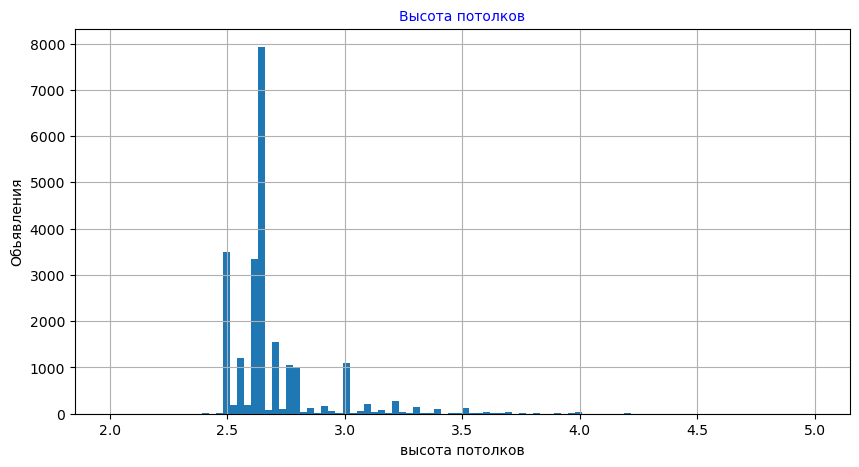

In [90]:
#построим график распределения объявлений по высоте потолков
(data['ceiling_height']
  .plot(kind= 'hist', bins=100, range=(2, 5), figsize=(10,5), legend = False, fontsize = 10, grid=True) 
  .set_title('Высота потолков', fontsize = 10, color = 'Blue')); 
 
plt.xlabel('высота потолков',fontsize = 10) 
plt.ylabel('Обьявления',fontsize = 10) 
plt.show()

Вывод: высота потолков минимальная 2.4 по Госту и максимальная 4.4. В большинтсве продаваемых кватртир высота потолка будет от 2.65 до 2.70 , что собственно и является стандартным размером. Имеют место быть потолки и большего размера , но это уже в виде исключений из правил, потому что разница между промежутком от 2.65 до 2.7 и остальными значенями очень велика в районе 45.000 шт.

##### этаж квартиры

In [91]:
#данные статистического формата
data['floor'].describe()

count    23089.000000
mean         5.848153
std          4.838798
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

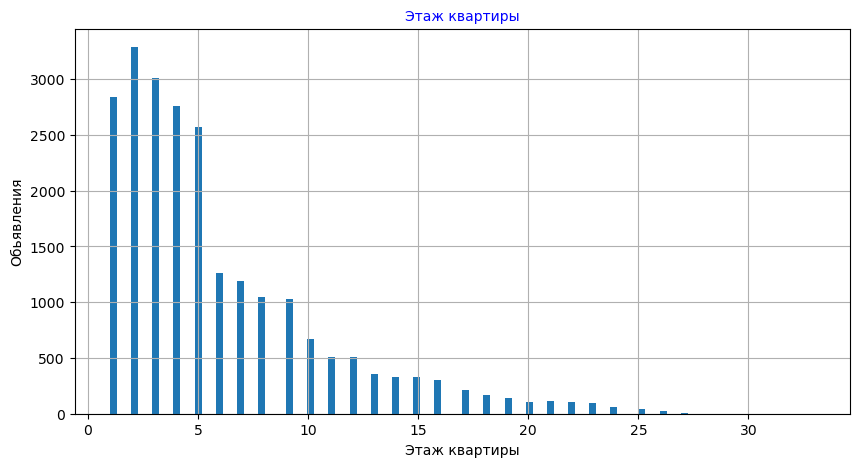

In [92]:
#построим график распределения объявлений по этажам
(data['floor']
  .plot(kind= 'hist', bins=100, range=(1, 33), figsize=(10,5), legend = False, fontsize = 10, grid=True) 
  .set_title('Этаж квартиры', fontsize = 10, color = 'Blue')); 
 
plt.xlabel('Этаж квартиры',fontsize = 10) 
plt.ylabel('Обьявления',fontsize = 10) 
plt.show()

Вывод: Самое большое колличество продаваемых квартир расположено до 6 этажа - 14 481. Можно сделать предположение, что большая часть квартир вторичное жилье - старый фонд или дома 5 этажные. Больше всего продаваемых квартир на 2 этаже. Чем выше этаж тем меньше люди выставляют объявления о продаже.

In [93]:
data['floors_total'].value_counts() #Гипотеза верна

5     5683
9     3724
16    1342
12    1341
4     1174
10    1162
25    1033
6      892
17     816
3      650
7      582
14     539
18     481
24     434
8      383
2      370
15     358
23     337
19     322
22     278
20     268
13     227
11     197
27     159
21     145
26     121
1       23
28      21
35      21
36       2
34       1
29       1
33       1
52       1
Name: floors_total, dtype: int64

##### тип этажа квартиры («первый», «последний», «другой»)

In [94]:
#данные статистического формата
data['floor_share'].describe(include=['O'])

count      23089
unique         3
top       другой
freq       16979
Name: floor_share, dtype: object

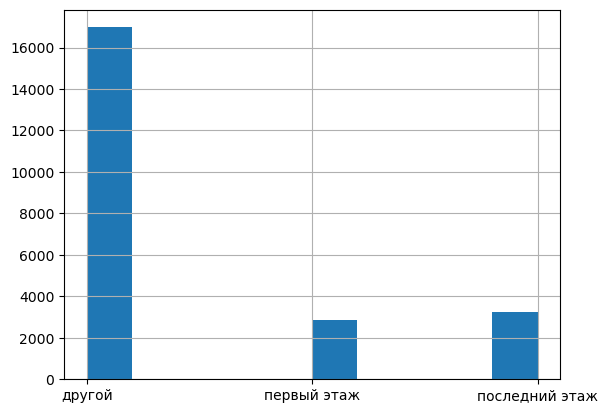

In [95]:
#построим график распределения объявлений по этажам
data['floor_share'].hist();

Вывод: Меньше всего продают квартир на первом этаже 2 844 шт. Последний этаж на втором месте после первого - 3 266 шт. И квартиры между первым и последним этажом 16 979 шт. 

In [96]:
#построим на количественные показатели
data['floor_share'].value_counts()

другой            16979
последний этаж     3266
первый этаж        2844
Name: floor_share, dtype: int64

##### общее количество этажей в доме

In [97]:
#данные статистического формата
data['floors_total'].describe()

count    23089.000000
mean        10.619386
std          6.542405
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         52.000000
Name: floors_total, dtype: float64

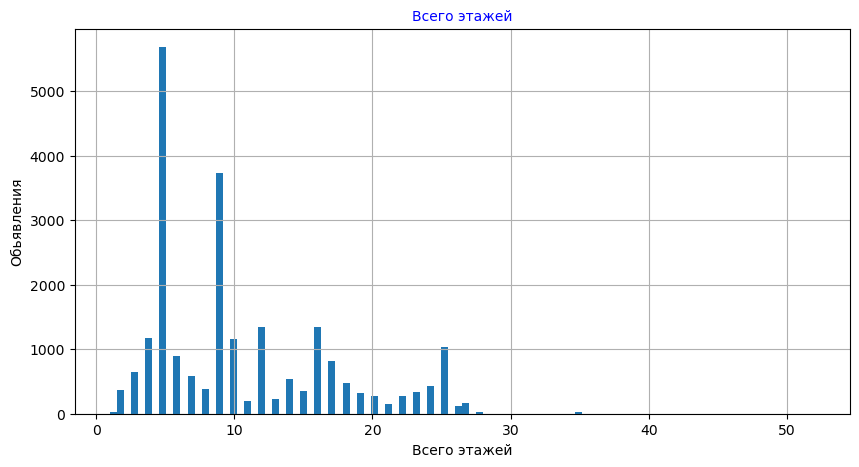

In [98]:
#построим график распределения объявлений по количеству этажей
(data['floors_total']
  .plot(kind= 'hist', bins=100, range=(1, 52), figsize=(10,5), legend = False, fontsize = 10, grid=True) 
  .set_title('Всего этажей', fontsize = 10, color = 'Blue')); 
 
plt.xlabel('Всего этажей',fontsize = 10) 
plt.ylabel('Обьявления',fontsize = 10) 
plt.show()

Вывод: Самое большое значение 52 этажа. К самому маленькому относится 1 этажное сдание. Больше всего домов с 5 этажами. Следом идет 9 этажные дома. В основной своей массе 5 этажные дома - это старый фонд и вторичное жилье, гипотезу мы подтвердили выше. В самых высоких домах меньше всего продающихся квартир. 

In [99]:
#построим на количественные показатели
data['floors_total'].value_counts()

5     5683
9     3724
16    1342
12    1341
4     1174
10    1162
25    1033
6      892
17     816
3      650
7      582
14     539
18     481
24     434
8      383
2      370
15     358
23     337
19     322
22     278
20     268
13     227
11     197
27     159
21     145
26     121
1       23
28      21
35      21
36       2
34       1
29       1
33       1
52       1
Name: floors_total, dtype: int64

##### расстояние до центра города в метрах

In [100]:
#данные статистического формата
data['cityCenters_nearest'].describe()

count    23089.000000
mean     10944.898090
std       9654.386786
min          0.000000
25%       2391.000000
50%      11285.000000
75%      15277.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

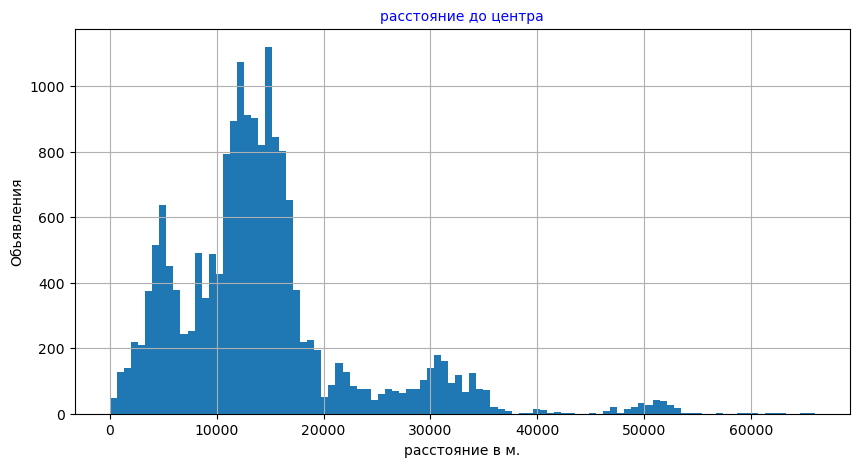

In [101]:
#построим график распределения объявлений по расстоянию до центра
(data['cityCenters_nearest']
  .plot(kind= 'hist', bins=100, range=(1, 65968), figsize=(10,5), legend = False, fontsize = 10, grid=True) 
  .set_title('расстояние до центра', fontsize = 10, color = 'Blue')); 
 
plt.xlabel('расстояние в м.',fontsize = 10) 
plt.ylabel('Обьявления',fontsize = 10) 
plt.show()

Вывод: большая часть квартир расположена в 10 - 15 км от центра города. От 19 до 65 км квартир продается меньше, т.е. чем дальше от центра квартиры , тем меньше люди хотят их продавать , что можно сказать про квартиры в самом центре города .

##### расстояние до ближайшего аэропорта

In [102]:
#данные статистического формата
data['airports_nearest'].describe()

count    17758.000000
mean     28844.827402
std      12635.309823
min          0.000000
25%      18585.000000
50%      26791.000000
75%      37334.750000
max      84869.000000
Name: airports_nearest, dtype: float64

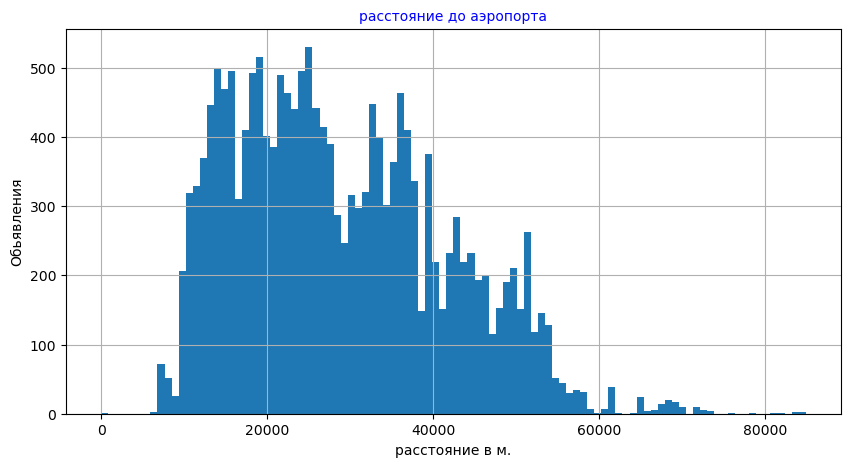

In [103]:
#построим график распределения объявлений по расстоянию до аэропорта
(data['airports_nearest']
  .plot(kind= 'hist', bins=100, range=(0, 84869), figsize=(10,5), legend = False, fontsize = 10, grid=True) 
  .set_title('расстояние до аэропорта', fontsize = 10, color = 'Blue')); 
 
plt.xlabel('расстояние в м.',fontsize = 10) 
plt.ylabel('Обьявления',fontsize = 10) 
plt.show()

Вывод:самое ближайшее расстояние от аэропорта 6450 такая удаленность связана с ограничением на строительство вблизи аэропортов. Больше всего квартир продается на расстоянии от 9к км до 55 потом идет на спад, скорее всего заканчивается инфраструктура и люди меньше продают свою недвижимость (что подтверждает гипотезу о том, что чем дальше от инфраструктуры, тем меньше продается квартир) , отдаленность связана с тем , что аэропорт в области Санкт - Питербурга 1. 

##### расстояние до ближайшего парка

In [104]:
#данные статистического формата
data['parks_nearest'].describe()

count    23089.000000
mean       168.342674
std        307.046623
min          0.000000
25%          0.000000
50%          0.000000
75%        304.000000
max       3190.000000
Name: parks_nearest, dtype: float64

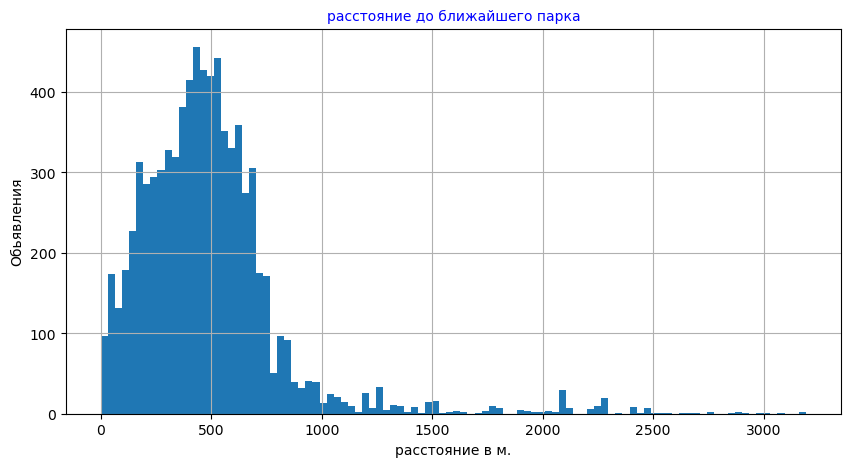

In [105]:
#построим график распределения объявлений по расстоянию до ближайшего парка
(data['parks_nearest']
  .plot(kind= 'hist', bins=100, range=(1, 3190), figsize=(10,5), legend = False, fontsize = 10, grid=True) 
  .set_title('расстояние до ближайшего парка', fontsize = 10, color = 'Blue')); 
 
plt.xlabel('расстояние в м.',fontsize = 10) 
plt.ylabel('Обьявления',fontsize = 10) 
plt.show()

Вывод: У большинства продающихся квартир расстояние до парка составляет до 1 км. Далее идет спад количества продающихся квартир , парки обычно сторятся в центре или окрестностях поселения, следовательно чем дальше от парка , тем меньше квартир продается (гипотеза подтверждается).

##### день и месяц публикации объявления

In [106]:
#данные статистического формата
data['number_month'].unique()

array([ 3, 12,  8,  7,  6,  9, 11,  4,  5,  2,  1, 10], dtype=int64)

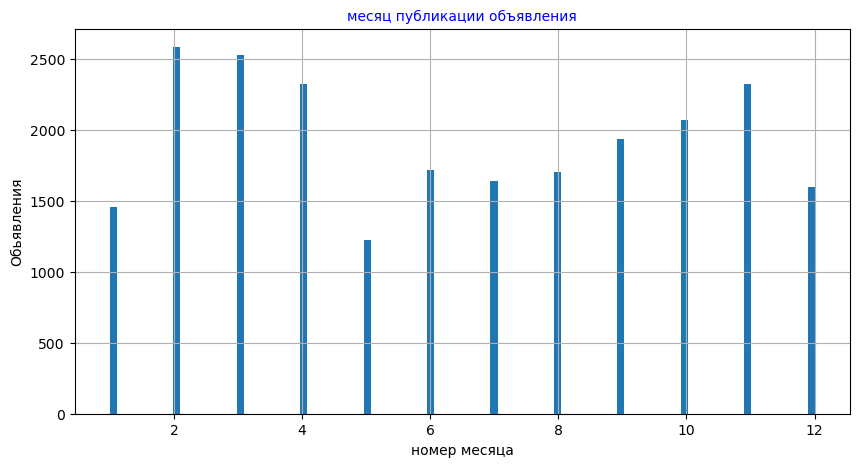

In [107]:
#построим график распределения объявлений по месяцу публикаций
(data['number_month']
  .plot(kind= 'hist', bins=100, range=(1, 12), figsize=(10,5), legend = False, fontsize = 10, grid=True) 
  .set_title('месяц публикации объявления', fontsize = 10, color = 'Blue')); 
 
plt.xlabel('номер месяца',fontsize = 10) 
plt.ylabel('Обьявления',fontsize = 10) 
plt.show()

Вывод: при выводе гистограммы по месяцам мы наблюдаем, что большего всего квартир на продажу выставляют в феврале и марте и апреле, скачок также наблюдается в ноябре. Самые низкие показатели в январе - посленовогодние праздники и в мае - майские праздники.

#### 2. Изучим, как быстро продавались квартиры (столбец "days_exposition" -  сколько дней было размещено каждое объявление)

In [108]:
#Средняя и медиана 
data["days_exposition"].describe()

count    19962.000000
mean       181.991784
std        220.625581
min          1.000000
25%         45.000000
50%         97.000000
75%        233.000000
max       1580.000000
Name: days_exposition, dtype: float64

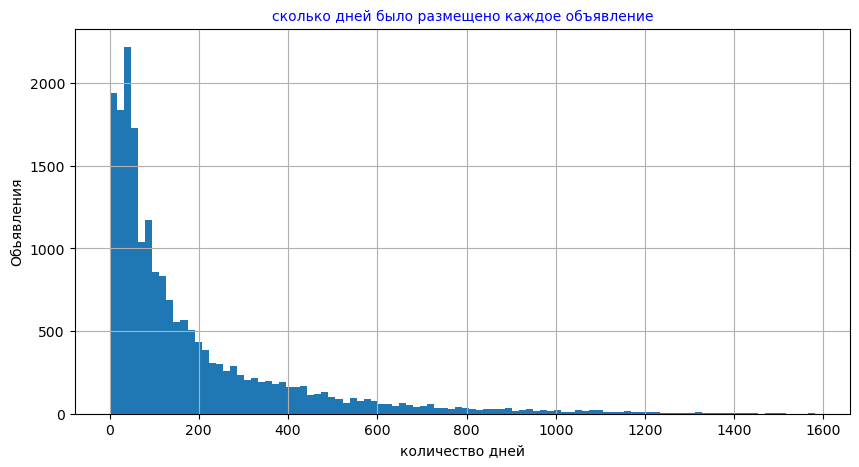

In [109]:
#гистограмма
(data['days_exposition']
  .plot(kind= 'hist', bins=100, range=(1, 1580), figsize=(10,5), legend = False, fontsize = 10, grid=True) 
  .set_title('сколько дней было размещено каждое объявление', fontsize = 10, color = 'Blue')); 
 
plt.xlabel('количество дней',fontsize = 10) 
plt.ylabel('Обьявления',fontsize = 10) 
plt.show()

In [110]:
#построим на количественные показатели
data["days_exposition"].value_counts()

45.0      830
60.0      526
7.0       224
30.0      204
90.0      198
         ... 
822.0       1
734.0       1
1037.0      1
992.0       1
971.0       1
Name: days_exposition, Length: 1139, dtype: int64

Вывод:
1. Продажа недвижимости может занимать от 1 дня до 4-ех лет и 120 дней. 
2. Аномальные значения - 45 и 60 дни.
3. Быстрыми продажами ,на мой взгляд ,можно называть продажи , которые осуществялются в течении месяца.

#### 3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?

In [111]:
#оставляем только необходимые столбцы
data_fact = data[['total_area','living_area','kitchen_area','rooms','floor','number_month','last_price']].copy()
data_fact['last_price'] = data_fact['last_price']/1000000

In [112]:
#сделаем числовую корреляцию
data_fact.corr()

,total_area,living_area,kitchen_area,rooms,floor,number_month,last_price
total_area,1.000000,0.911735,0.588294,0.760470,-0.017908,0.005852,0.649884
living_area,0.911735,1.000000,0.420727,0.858205,-0.094855,0.000011,0.548919
kitchen_area,0.588294,0.420727,1.000000,0.272389,0.128370,0.003122,0.451066
rooms,0.760470,0.858205,0.272389,1.000000,-0.142699,-0.001545,0.360661
floor,-0.017908,-0.094855,0.128370,-0.142699,1.000000,0.019920,0.030083
number_month,0.005852,0.000011,0.003122,-0.001545,0.019920,1.000000,0.002171
last_price,0.649884,0.548919,0.451066,0.360661,0.030083,0.002171,1.000000


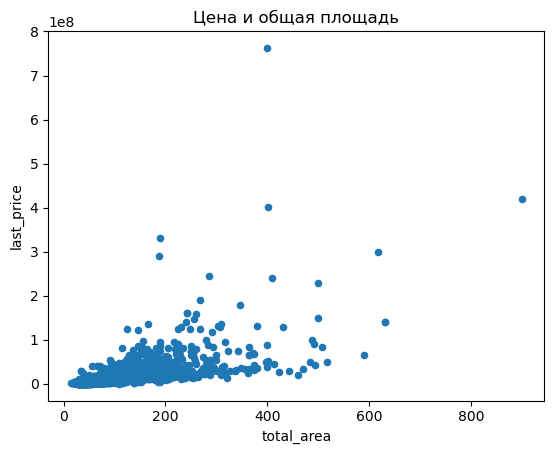

In [113]:
#построим диаграмму рассеяния зависимости цены и общей площади.
data.plot(x='total_area', y = 'last_price', kind = 'scatter', title = 'Цена и общая площадь');

Вывод: При сравнении цены и общай площади наблюдается зависимость - чем больше площадь , тем больше цена.

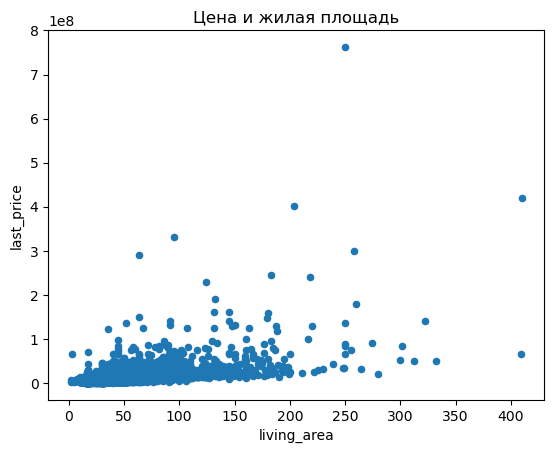

In [114]:
#построим диаграмму рассеяния зависимости цены и жилой площади.
data.plot(x='living_area', y = 'last_price', kind = 'scatter', title = 'Цена и жилая площадь');

Вывод: При сравнении цены и жилой площади также наблюдается зависимость - чем больше площадь, тем больше цена. На корреляции мы видим показатель 0.5, который говорит нам о росте двух величин.

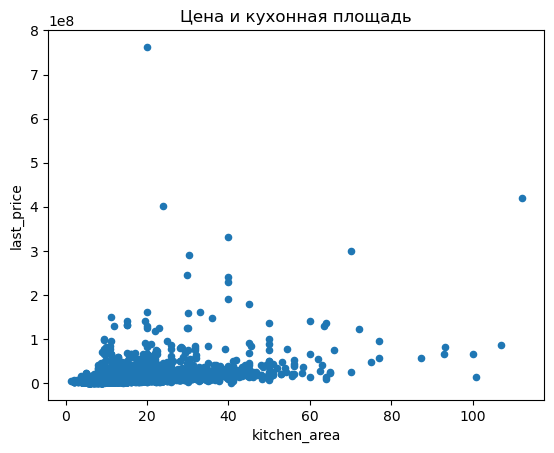

In [115]:
#построим диаграмму рассеяния зависимости цены и кухонной площади.
data.plot(x='kitchen_area', y = 'last_price', kind = 'scatter', title = 'Цена и кухонная площадь');

Вывод: При сравнении цены и кухонной площади также наблюдается зависимость - чем больше кухонная площадь, тем больше цена. На корреляции мы видим показатель 0.4, который говорит нам о росте двух величин.

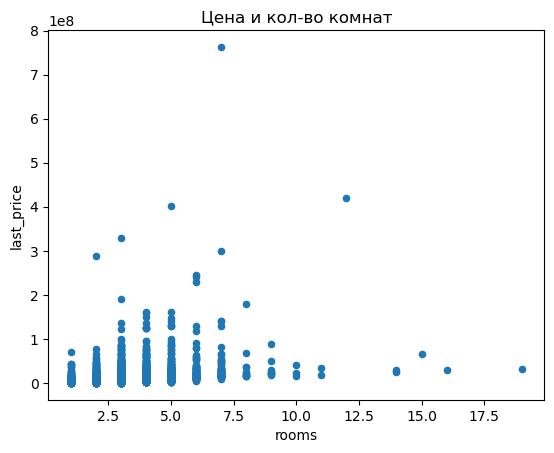

In [116]:
#построим диаграмму рассеяния зависимости цены и кол-ва комнат.
data.plot(x='rooms', y = 'last_price', kind = 'scatter', title = 'Цена и кол-во комнат');

Вывод: При сравнении цены и кол-ва камнат также наблюдается маленькая зависимость - чем больше комнат, тем больше цена. На корреляции мы видим показатель 0.3, который говорит нам о незначительном росте двух величин.

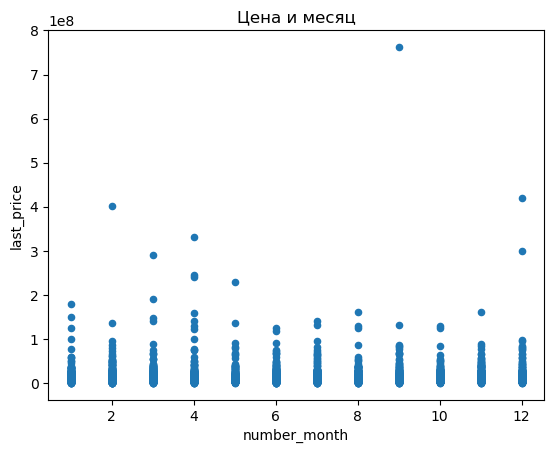

In [117]:
#построим диаграмму рассеяния зависимости цены и номера месяца.
data.plot(x='number_month', y = 'last_price', kind = 'scatter', title = 'Цена и месяц');

Вывод: При сравнении цены и номера месяца, зависимость не наблюдается.

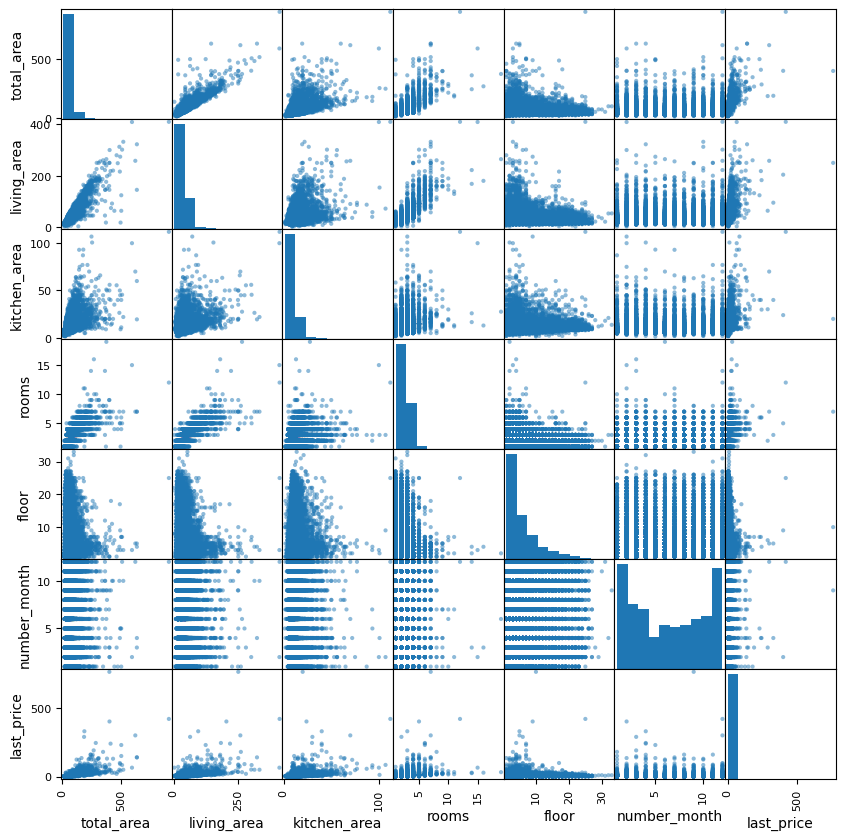

In [118]:
#и нарисуем диаграмму рассеяния
pd.plotting.scatter_matrix(data_fact, figsize= (10,10))
plt.show()

Вывод: в большей степени на цену влияет общая площадь объекта, в меньшей номер месяца (когда выставили на продажу) и этаж. 

#### 4.Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [119]:
#сделаем счетчик, который нам пригодится
data['total'] = 1

data_10 = data.pivot_table(
    index = 'locality_name', 
    values = ['total', 'last_price','total_area'] ,
    aggfunc = 'sum').sort_values(by='total', ascending = False)

#первые 10 городов по кол-ву объявлений
data_10 = data_10.head(10)


In [120]:
#расчет стоимости 1 кв. метра 
data_10['meter_sell'] = data_10['last_price']/data_10['total_area']
data_10 = data_10.sort_values(by='meter_sell', ascending = False)
data_10

,last_price,total,total_area,meter_sell
locality_name,,,,
Санкт-Петербург,1.240978e+11,15385,1000636.00,124018.930185
Пушкин,2.387074e+09,369,22712.98,105097.361245
Кудрово,1.960632e+09,436,20946.35,93602.549370
Парголово,1.457350e+09,324,16733.68,87090.852640
Мурино,2.037201e+09,537,24579.64,82881.663442
Шушары,1.782972e+09,431,23444.71,76050.076926
Колпино,1.329819e+09,335,17854.94,74479.065514
Гатчина,1.050719e+09,301,15351.28,68445.065167
Всеволожск,1.475126e+09,386,21793.85,67685.444518


#### 5.Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра.


In [121]:
spb_flat = data.query('locality_name == "Санкт-Петербург"') 

In [122]:
#вычислим среднюю стоимость одного км
spb_km_price = spb_flat['last_price'].sum()/spb_flat['city_nearest_km'].sum()
spb_km_price

699241.054937315

In [123]:
#вычислим корреляцию
spb_flat = spb_flat[['last_price','city_nearest_km']]
spb_flat.corr()

,last_price,city_nearest_km
last_price,1.000000,-0.260309
city_nearest_km,-0.260309,1.000000


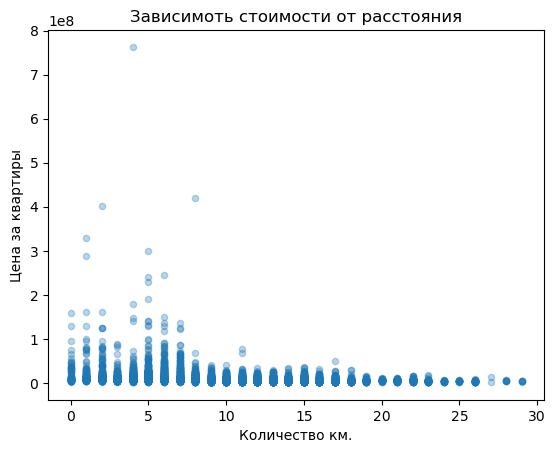

In [124]:
#Соотношение цены 
spb_flat.plot(
    x='city_nearest_km', y = 'last_price', kind = 'scatter', alpha = 0.3,
    xlabel='Количество км.', ylabel = 'Цена за квартиры', title = 'Зависимоть стоимости от расстояния'
)
plt.show()

Вывод: По графику можно определить - чем больше расстояние до центра , тем меньше стоимость квартир. 

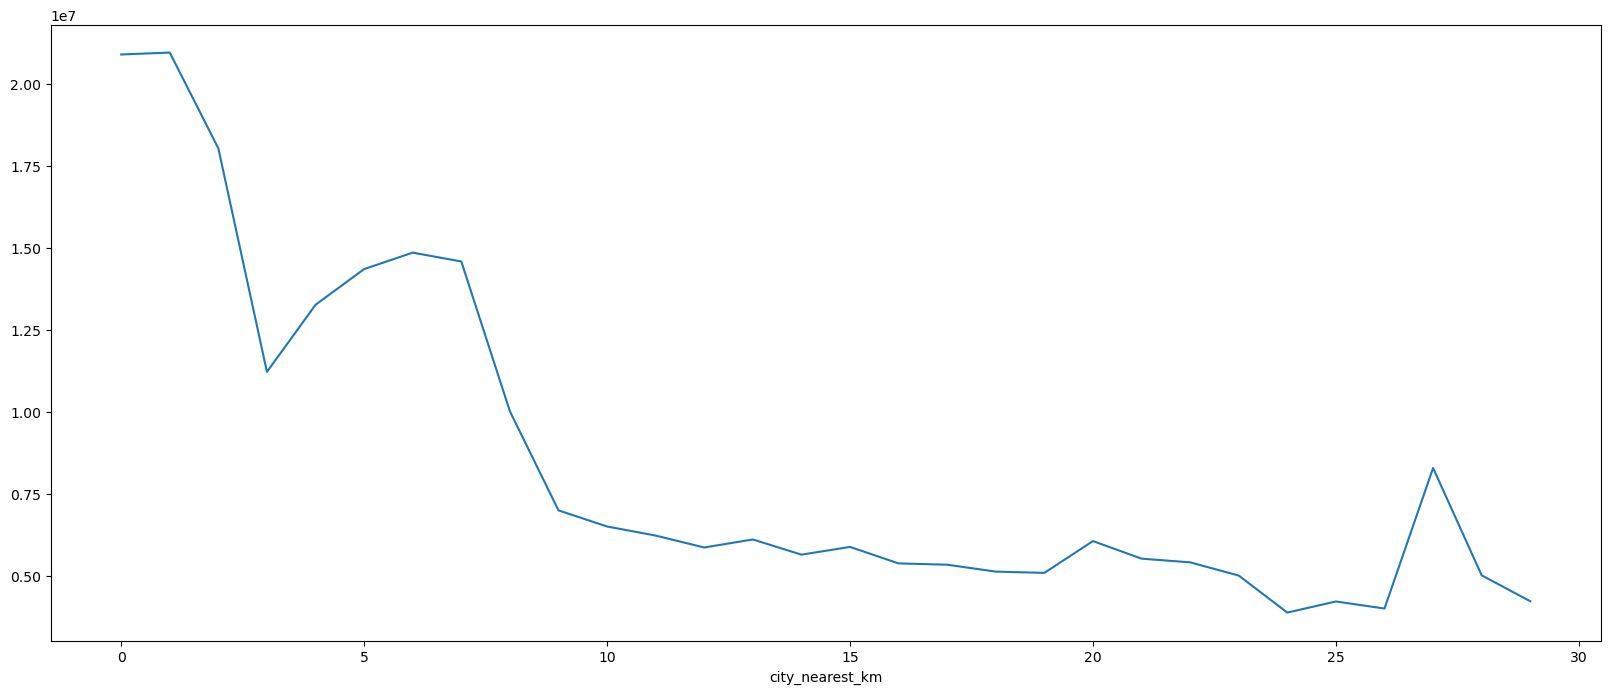

In [125]:
# посмотрим на среднюю цену на квартир в Питере
data[data['locality_name'] == 'Санкт-Петербург'].groupby('city_nearest_km')['last_price'].mean().plot(figsize = (20, 8));

In [126]:
#на 27 км обнаружена аномалия, посмотрим что это
data.query('city_nearest_km == 27 & locality_name == "Санкт-Петербург"')

,total_images,last_price,total_area,cost_meter,first_day_exposition,number_day,number_month,number_year,rooms,ceiling_height,...,locality_status,airports_nearest,cityCenters_nearest,city_nearest_km,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total
748,13,14350000.0,74.0,193918.9,2017-11-28,1,11,2017,2,3.13,...,Город,23888.0,27313.0,27.0,1.0,1496.0,0.0,NaN,128.0,1
5961,6,2250000.0,32.0,70312.5,2018-02-27,1,2,2018,1,2.65,...,Город,24006.0,27431.0,27.0,0.0,0.0,0.0,NaN,178.0,1


Строка 748 , квартира со стоимостью `14 350 000` дает такой скачок на графике

# Шаг 5. Общий вывод

На начальном этапе проекта "исследовательский анализ данных, мы ознакомились с предоставленными данными сервиса Яндекс Недвижимость, а точнее — архивом объявлений за несколько лет о продажах квартир в Санкт-Петербурге и соседних населённых пунктах.

<blockquote>Весь проект поделен на 3 основные части:<ol>
<li>Изучение данных</li>
<li>Предобработка данных</li>
<li>Поиск особенностей и зависимости, которые существуют на рынке недвижимости</li>
</ol>
</blockquote> 


***Изучение данных.*** <br>
<br>
*В первой части - грязных данных было выявлено:
Общее количество строк - `23 699` и `22` столбца с данными, в `14` из них были пропущенные значения, общая доля пропусков составляет `19.5%` от общего количества данных.
Пропуски планируется закрыть в 8 столбцах. А так же изменим тип данных столбца с bool на int и с object на datetime для дальнейшего выявления закономерностей.*


*Во второй части - очищенных данных было выявлено:*
- Больше всего квартир с площадью от 42 до 60 кв.м.
- Самое большее количество объявлений с площадью от 30 до 50 кв. м. после график идет на спад
- Чем больше в квартире жилой площади, тем меньше таких квартир выставляют на продажу.
- Кухня занимает 1/3 площади все квартиры, в большинстве своем.
- Больше всего объявлений с 2 - 1 -3 комнатными квартирами.
- Гипотеза_2 большинство квартир , где продаются квартиры - 5 этажные дома (старый фонд - вторичное жилье). Мы ее подтвердили, 
 количество продаваемых квартир расположено до 6 этажа - 14 481. Количество 5 этажных домов - 5683 (большее из представленных).
- Чем выше этаж, тем меньше люди выставляют объявление о продаже.
- Первый этаж считается самым элитным , ведь квартир на первом этаже продают меньше , чем на последнем.
- Чем дальше от центра, тем меньше люди выставляют на продажу квартиры
- Больше всего квартир выставляют продажу в феврале, марте и апреле , скачок также в ноябре.
- Средняя цена одного кв.м. в Санкт Петербурге больше, чем в окрестностях 


***Предобработка данных.***<br>
<br>
Если взять все столбцы с пропущенными значениями 64% строк имеют пропуски.
Замена пустых значений:
 
* locality_name - пустые значения были удалены `тут мы создали столбец со значениями Город и Пригород и оказалось, что объявлений с городов составляет 85% от общего кол-ва`

* rooms - в данном столбце пропусков нет, но я выдвинул гипотезу_1 , о том, что люди не ставили кол-во комнат , если у них студия. Поиск в таблице показал , что количество студий - 149, а комнат с значением 0 - 197. Совместим условия и найдем 138 строк, где в столбце "rooms" значение комнат 0 и столбец "studio" равен False.  Гипотеза подтверждена, поэтому поменяем значение 0 на 1.

* ceiling_height - высота потолков,  значения в столбце являются количественными, поэтому заменим пропуски медианным значением. А также нашли ошибочные значения 100 и тд. , определено, что выше 4.5 и ниже 2.3 считается ошибками.

* floors_total - всего этажей в доме, Так как 1 этажные и 52 этажные дома имеют место быть в СПБ и окрестностях заменим пропуски на медианное значение, самый высокий дом найден в Кронштадте - 60 этажей, таких там нет , поэтому сократим это значение.

* living_area -  найдем пропуски и заполним их медианным значением по количеству комнат. Т.е. среднее значение по кол-ву комнат, но может возникнуть проблема , что средние значения жилой площади (living_area) по кол-ву комнат могут быть больше , чем (total_area), поэтому от таких случев необходимо избавиться.

* is_apartment - апартаменты (булев тип), значения - список уникальных значений (True/False), но в данном столбце 87% пропусков. Есть гипотеза, что люди ничего не отмечали в категории "apartment" (так как знали , что апартаменты это коммерческая недвижимость), т.е. Nan = "False".

* kitchen_area - площадь кухни в квадратных метрах (м²) 9% пропусков от общей массы количества строк. Заменим медианными значениями по количеству комнат . Еще заметили одну особенность, так как пропуски в living_area закрыты медианным значением, как и в kitchen_area , то может произойти следущее: living_area (общая площадь) + kitchen_area (площадь кухни) будет больше , чем total_area (общая площадь), данное явление необходимо предотвратить.

* balcony - наличие балкона в квартире , есть предположение , что люди не отмечали число балконов в квартире , если их нет, так и появились пропуски - заменим пропуски на 0

* cityCenters_nearest , parks_nearest - заменили пустые значения на 0 

Ко второму шагу предобработки данных, также относится изменение типа данных для удобства исследовательского анализа, заменили булевы значения на числовые: first_day_exposition, is_apartment, studio, open_plan.

В третьем шаге , мы меняли неявные дубликаты в столбце 'locality_name'  в виде "поселок"/"посёлок". Выделили статус населенных пунктов: поселок ,деревня, село, город, ст (садовые товарищества) в отдельный столбец и удалили эти пункты из основного столбца "locality_name".

Также добавили в таблицу новые столбцы: 
* cost_meter - Цена одного квадратного метра,  
* number_day - День недели публикации объявления, 
* number_month - Mесяц публикации объявления, 
* number_year - Год публикации объявления, 
* floor_share - Тип этажа квартиры и перевели расстояние до центра города из м в км.


***Поиск особенностей и зависимости, которые существуют на рынке недвижимости.***

К особенностям можно отнести 10 пунктов отмеченных во второй части Изучения данных.

К зависимостям :
* Цена на квартиру в большей степени зависит от площади квартиры.
* Цена на квартиру в меньшей степени зависит от месяца или дня публикации.
* Чем ближе квартира к центру , тем она дороже.